# Biblioteki i bazy 

In [1]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import jarque_bera
import seaborn as sns
import numpy as np
import pylab
from scipy.stats import f
import scipy.stats as stats
from scipy.special import ndtri
from scipy.stats import norm


In [2]:
baza_transformed = pd.read_csv('/Users/oscar/Downloads/pandas/LUKA_PLACOWA - uporzadkowane/pomocnicze_bazy/baza_1400zmiennych_po_redukcji.csv')
pomidor = pd.read_csv('/Users/oscar/Downloads/pandas/LUKA_PLACOWA - uporzadkowane/pomocnicze_bazy/baza_z_iloczynami_x_gender.csv')
dep = pomidor.pop('Wages')

In [3]:
model_redu2 = sm.OLS(dep, baza_transformed).fit()

# QQplot

In [4]:
residuals = model_redu2.resid

((array([-4.26138524, -4.05885177, -3.94855328, ...,  3.94855328,
          4.05885177,  4.26138524]),
  array([-2.14302189, -2.09067775, -2.03438735, ...,  2.59462649,
          2.70044315,  2.70910319])),
 (0.29194790655050434, 1.9856788688104547e-13, 0.9925987135270096))

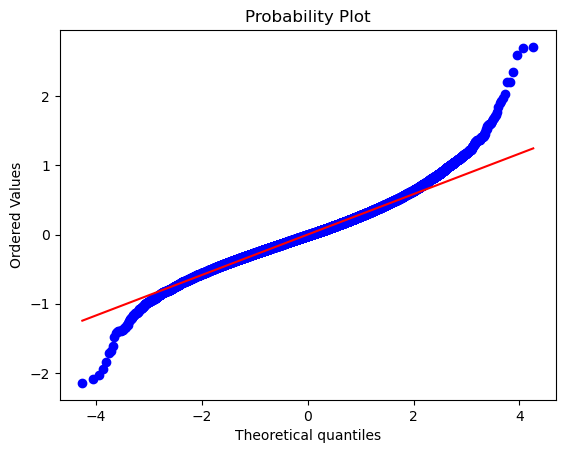

In [5]:
stats.probplot(residuals, dist="norm", plot=plt, rvalue= False)
#plt.savefig("1400_zmiennych_qqplot.png", format = "png", dpi = 300)

# Histogram reszt

In [6]:
T_k = len(baza_transformed.index) - len(baza_transformed.columns)
T = len(baza_transformed.index)

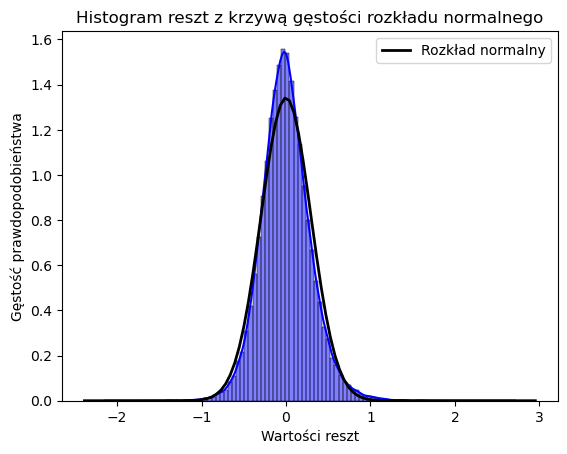

In [7]:
mu, std = norm.fit(residuals)
std = ((std **2)*(T/T_k))**0.5
sns.histplot(residuals, bins=100, kde=True, color='blue', edgecolor='black', stat='density')
xmin, xmax = plt.xlim()  # Zakres na osi X
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)  # PDF rozkładu normalnego
plt.plot(x, p, 'k', linewidth=2, label='Rozkład normalny')
plt.title("Histogram reszt z krzywą gęstości rozkładu normalnego")
plt.xlabel("Wartości reszt")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()
plt.rcParams['figure.dpi'] = 100 #rozmiar
# Wyświetlenie wykresu
#plt.show()
#plt.savefig("1400_zmiennych_model_histogram.png", format = "png", dpi = 300)

In [8]:
baza_transformed.head()

,const,age^2,Total exp,exp_at_current^2,Lubelskie,Opolskie,wyzsze magisterskie inżynierskie,przemysl lekki,technologie informatyczne,budownictwo,...,Specjalista_x_gospodarka magazynowa_x_gender,Specjalista_x_architektury/projektowania_x_gender,Specjalista_x_public relations_x_gender,Team leader/koordynator_x_obsluga klienta_x_gender,"Team leader/koordynator_x_finanse, księgowosc, audyt_x_gender",Team leader/koordynator_x_stacjonarna (punkt sprzedazy)_x_gender,Team leader/koordynator_x_ogolny dzial IT_x_gender,Team leader/koordynator_x_przez Internet_x_gender,Team leader/koordynator_x_grafiki komputerowej_x_gender,"Brygadzista/mistrz_x_techniczny, serwis_x_gender"
0,1,441,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,576,5,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2401,20,361,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1024,6,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,841,5,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Rozklady plci

In [9]:
baza_rozklady = baza_transformed.copy()
baza_rozklady['residuals'] = residuals
baza_rozklady['gender'] = pomidor['gender']
meskie_reszty = baza_rozklady[baza_rozklady['gender'] == 0]['residuals']
kobiece_reszty = baza_rozklady[baza_rozklady['gender'] == 1]['residuals']
baza_rozklady.drop(columns = ['residuals', 'gender'])

,const,age^2,Total exp,exp_at_current^2,Lubelskie,Opolskie,wyzsze magisterskie inżynierskie,przemysl lekki,technologie informatyczne,budownictwo,...,Specjalista_x_gospodarka magazynowa_x_gender,Specjalista_x_architektury/projektowania_x_gender,Specjalista_x_public relations_x_gender,Team leader/koordynator_x_obsluga klienta_x_gender,"Team leader/koordynator_x_finanse, księgowosc, audyt_x_gender",Team leader/koordynator_x_stacjonarna (punkt sprzedazy)_x_gender,Team leader/koordynator_x_ogolny dzial IT_x_gender,Team leader/koordynator_x_przez Internet_x_gender,Team leader/koordynator_x_grafiki komputerowej_x_gender,"Brygadzista/mistrz_x_techniczny, serwis_x_gender"
0,1,441,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,576,5,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2401,20,361,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1024,6,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,841,5,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68230,1,625,6,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
68231,1,729,6,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68232,1,625,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68233,1,484,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Meski rozklad 

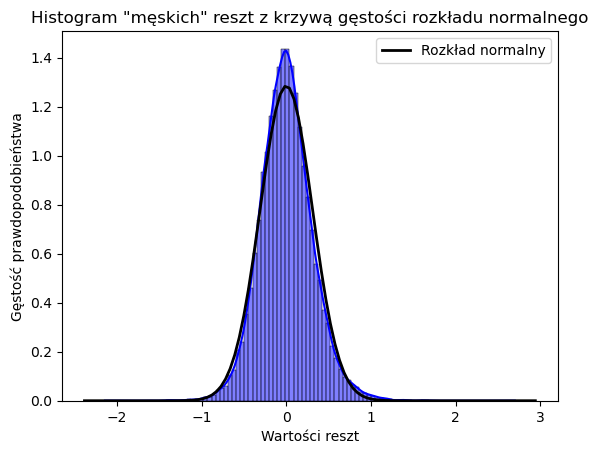

In [10]:
mu0, std0 = norm.fit(meskie_reszty)

sns.histplot(meskie_reszty, bins=100, kde=True, color='blue', edgecolor='black', stat='density')
xmin0, xmax0 = plt.xlim()  # Zakres na osi X
x0 = np.linspace(xmin0, xmax0, 100)
p0 = norm.pdf(x0, mu0, std0)  # PDF rozkładu normalnego
plt.plot(x0, p0, 'k', linewidth=2, label='Rozkład normalny')
plt.title('Histogram "męskich" reszt z krzywą gęstości rozkładu normalnego')
plt.xlabel("Wartości reszt")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()
plt.rcParams['figure.dpi'] = 100 #rozmiar
#plt.savefig("1400_zmiennych_model_meski_histogram.png", format = "png", dpi = 300)

## Kobiecy rozklad

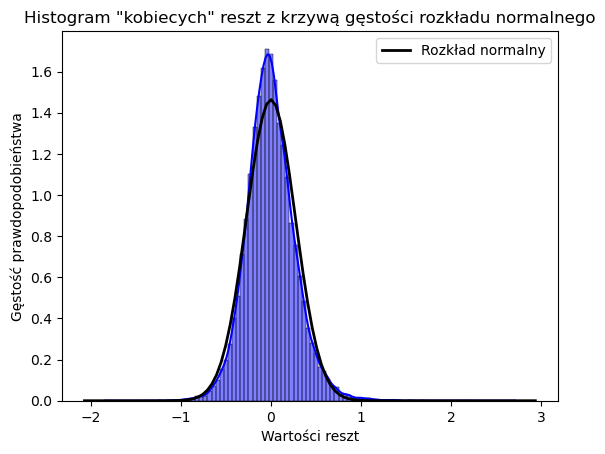

In [11]:
mu1, std1 = norm.fit(kobiece_reszty)
sns.histplot(kobiece_reszty, bins=100, kde=True, color='blue', edgecolor='black', stat='density')
xmin1, xmax1 = plt.xlim()  # Zakres na osi X
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, mu1, std1)  # PDF rozkładu normalnego
plt.plot(x1, p1, 'k', linewidth=2, label='Rozkład normalny')
plt.title('Histogram "kobiecych" reszt z krzywą gęstości rozkładu normalnego')
plt.xlabel("Wartości reszt")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()
plt.rcParams['figure.dpi'] = 100 #rozmiar
#plt.savefig("1400_zmiennych_model_kobiecy_histogram.png", format = "png", dpi = 300)

# Test Breuscha-Pagana

In [12]:
bp_test = het_breuschpagan(residuals, model_redu2.model.exog, False) #False = nierobust
bp_test_stat, bp_p_value = bp_test[0], bp_test[1]
print({
    "statystyka testowa breuscha-pagana": bp_test_stat,
    "p-value": bp_p_value
}
     )

{'statystyka testowa breuscha-pagana': 8113.83816700388, 'p-value': 0.0}


In [13]:
part_1 = pd.DataFrame(model_redu2.params)
meskie_bety = part_1[~part_1.index.str.endswith("gender")]
zenskie_bety = part_1[part_1.index.str.endswith("gender")]
zenskie_bety.index = zenskie_bety.index.str.replace("_x_gender", "")
pomocnicza_baza = pd.read_csv('/Users/oscar/Downloads/pandas/LUKA_PLACOWA - uporzadkowane/pomocnicze_bazy/baza_z_iloczynami_bez_plci.csv')
grouped = pomocnicza_baza.groupby('gender').mean()
roznica_w_wynagrodzeniach = 0.21102151026869187
grouped.loc[2] = grouped.iloc[0] - grouped.iloc[1]
grouped.pop('Wages')
roznica_w_charakterystykach = grouped.iloc[2,:]
kobiece_srednie_charakterystyki = grouped.iloc[1]
grouped

,const,age,age^2,Total exp,exp_at_current,Total exp^2,exp_at_current^2,Malopolskie,Zachodnio-pomorskie,Lubuskie,...,Brygadzista/mistrz_x_stacjonarna (punkt sprzedazy),Brygadzista/mistrz_x_kadra pomocnicza,Brygadzista/mistrz_x_inny,Brygadzista/mistrz_x_produkcja,Brygadzista/mistrz_x_pracownicy budowy,Brygadzista/mistrz_x_kontroling,Brygadzista/mistrz_x_import i export,Brygadzista/mistrz_x_jakosc,Brygadzista/mistrz_x_gospodarka magazynowa,Brygadzista/mistrz_x_zarzad
gender,,,,,,,,,,,,,,,,,,,,,
0,1.0,33.975932,1245.434024,10.537560,5.662249,191.235434,72.198113,0.111621,0.031570,0.016646,...,0.000133,0.000106,0.001802,0.012087,0.004586,0.000557,0.000265,0.000583,0.001962,0.000106
1,1.0,33.663280,1211.951785,9.827231,5.279360,163.590908,65.557180,0.102494,0.033138,0.016159,...,0.000197,0.000131,0.000295,0.001868,0.000131,0.000229,0.000066,0.000164,0.000131,0.000066
2,0.0,0.312652,33.482240,0.710329,0.382889,27.644527,6.640933,0.009126,-0.001568,0.000487,...,-0.000064,-0.000025,0.001507,0.010219,0.004455,0.000327,0.000200,0.000419,0.001830,0.000040


# Poszczegolne plcie

In [14]:
bety_poszczegolnych_plci = pd.DataFrame(index = ["Mezczyzni", "-delta"], columns = grouped.columns)
for col in bety_poszczegolnych_plci.columns:
    if col in meskie_bety.index:
        bety_poszczegolnych_plci[col].iloc[0] = meskie_bety.loc[col].item()
    else:
        bety_poszczegolnych_plci[col].iloc[0] = 0

for col in bety_poszczegolnych_plci.columns:
    if col in zenskie_bety.index:
        bety_poszczegolnych_plci[col].iloc[1] = zenskie_bety.loc[col].iloc[0]
    else:
        bety_poszczegolnych_plci[col].iloc[1] = 0
bety_poszczegolnych_plci.loc['kobiety'] = bety_poszczegolnych_plci.iloc[0] + bety_poszczegolnych_plci.iloc[1]

bety_poszczegolnych_plci

/var/folders/9l/z_2pmnqx0bz9t44jq9c8_s1r0000gn/T/ipykernel_1182/431946880.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  bety_poszczegolnych_plci[col].iloc[0] = meskie_bety.loc[col].item()
/var/folders/9l/z_2pmnqx0bz9t44jq9c8_s1r0000gn/

,const,age,age^2,Total exp,exp_at_current,Total exp^2,exp_at_current^2,Malopolskie,Zachodnio-pomorskie,Lubuskie,...,Brygadzista/mistrz_x_stacjonarna (punkt sprzedazy),Brygadzista/mistrz_x_kadra pomocnicza,Brygadzista/mistrz_x_inny,Brygadzista/mistrz_x_produkcja,Brygadzista/mistrz_x_pracownicy budowy,Brygadzista/mistrz_x_kontroling,Brygadzista/mistrz_x_import i export,Brygadzista/mistrz_x_jakosc,Brygadzista/mistrz_x_gospodarka magazynowa,Brygadzista/mistrz_x_zarzad
Mezczyzni,7.942247,0,0.000025,0.029718,0,0,-0.000071,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.556994
-delta,0,0.00882,-0.000162,-0.026305,0,0,0,0,0,-0.074557,...,0,0,0,0,0,0,0,0,0,0
kobiety,7.942247,0.00882,-0.000137,0.003413,0,0,-0.000071,0,0,-0.074557,...,0,0,0,0,0,0,0,0,0,-0.556994


In [15]:
roznice_w_betach = bety_poszczegolnych_plci.iloc[1] * -1

In [16]:
model_redu2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Wages   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     83.59
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:56:03   Log-Likelihood:                -13314.
No. Observations:               68235   AIC:                         2.953e+04
Df Residuals:                   66786   BIC:                         4.276e+04
Df Model:                        1448                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================================================
                                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                          7.9422      0.009    871.228      0.000       7.924       7.960
age^2                                                                                                       2.544e-05   9.54e-06      2.668      0.008    6.75e-06    4.41e-05
Total exp                                                                                                      0.0297      0.001     27.694      0.000       0.028       0.032
exp_at_current^2                                                                                            -7.05e-05    3.9e-05     -1.810      0.070      -0.000    5.85e-06
Lubelskie                                                                                                      0.3772      0.121      3.107      0.002       0.139       0.615
Opolskie                                                                                                      -0.0325      0.013     -2.406      0.016      -0.059      -0.006
wyzsze magisterskie inżynierskie                                                                               0.0966      0.012      7.755      0.000       0.072       0.121
przemysl lekki                                                                                                -0.0953      0.020     -4.858      0.000      -0.134      -0.057
technologie informatyczne                                                                                     -0.0650      0.038     -1.705      0.088      -0.140       0.010
budownictwo                                                                                                   -0.0453      0.019     -2.338      0.019      -0.083      -0.007
media,wydawnictwa,reklama, PR                                                                                 -0.1450      0.028     -5.166      0.000      -0.200      -0.090
rolnictwo                                                                                                     -0.1970      0.121     -1.628      0.103      -0.434       0.040
handel                                                                                                        -0.0676      0.007    -10.246      0.000      -0.081      -0.055
Specjalista                                                                                                   -0.0860      0.015     -5.674      0.000      -0.116      -0.056
administracja, biuro zarzadu                                                                                

# Naprzeciwne plcie

In [17]:
meskie_finalne_bety = bety_poszczegolnych_plci.iloc[0]
kobiece_finalne_bety = bety_poszczegolnych_plci.iloc[2]
meska_macierz_x = pomocnicza_baza[pomocnicza_baza['gender']==0]
kobieca_macierz_x = pomocnicza_baza[pomocnicza_baza['gender']==1]
meskie_wynagrodzenia = pomocnicza_baza[pomocnicza_baza['gender']==0]['Wages']
kobiece_wynagrodzenia = pomocnicza_baza[pomocnicza_baza['gender']==1]['Wages']
meska_macierz_x.pop('gender')
kobieca_macierz_x.pop('gender')

0        1
2        1
5        1
7        1
12       1
        ..
68208    1
68216    1
68225    1
68230    1
68231    1
Name: gender, Length: 30509, dtype: int64

In [18]:
meska_macierz_x.pop('Wages')
kobieca_macierz_x.pop('Wages')

0         7.003065
2         7.086688
5         7.090077
7         7.118826
12        7.207860
           ...    
68208    10.518673
68216    10.596635
68225    10.645425
68230    10.680125
68231    10.682812
Name: Wages, Length: 30509, dtype: float64

In [19]:
meskie_reszty_nowe = meskie_wynagrodzenia - meska_macierz_x.dot(kobiece_finalne_bety)
meskie_reszty_nowe = meskie_reszty_nowe.astype(float)
kobiece_reszty_nowe = kobiece_wynagrodzenia - kobieca_macierz_x.dot(meskie_finalne_bety)
kobiece_reszty_nowe = kobiece_reszty_nowe.astype(float)

# Meskie X akobiece parametry

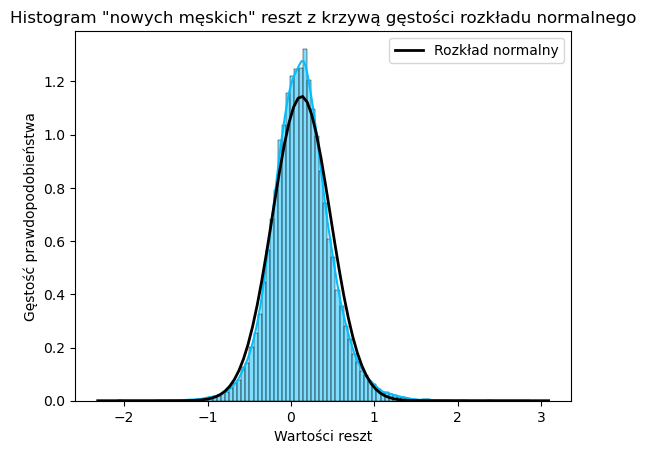

In [20]:
mu01, std01 = norm.fit(meskie_reszty_nowe)
sns.histplot(meskie_reszty_nowe, bins=100, kde=True, color='deepskyblue', edgecolor='black', stat='density')
xmin01, xmax01 = plt.xlim()  # Zakres na osi X
x01 = np.linspace(xmin01, xmax01, 100)
p01 = norm.pdf(x01, mu01, std01)  # PDF rozkładu normalnego
plt.plot(x01, p01, 'k', linewidth=2, label='Rozkład normalny')
plt.title('Histogram "nowych męskich" reszt z krzywą gęstości rozkładu normalnego')
plt.xlabel("Wartości reszt")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()
plt.rcParams['figure.dpi'] = 100 #rozmiar
#plt.savefig("1400_zmiennych_meskieX_histogram.png", format = "png", dpi = 300)

In [21]:
np.mean(meskie_reszty_nowe)

0.1253539534692666

In [22]:
meskie_reszty_nowe.var()

0.1214946229663769

# Kobiece X meskie parametry

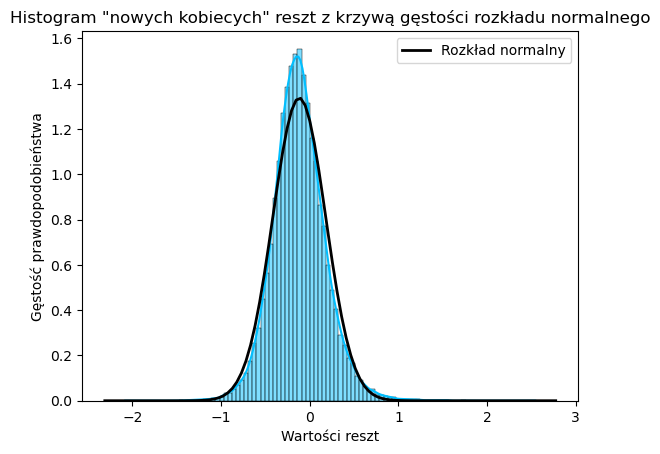

In [23]:
mu02, std02 = norm.fit(kobiece_reszty_nowe)
sns.histplot(kobiece_reszty_nowe, bins=100, kde=True, color='deepskyblue', edgecolor='black', stat='density')
xmin02, xmax02 = plt.xlim()  # Zakres na osi X
x02 = np.linspace(xmin02, xmax02, 100)
p02 = norm.pdf(x02, mu02, std02)  # PDF rozkładu normalnego
plt.plot(x02, p02, 'k', linewidth=2, label='Rozkład normalny')
plt.title('Histogram "nowych kobiecych" reszt z krzywą gęstości rozkładu normalnego')
plt.xlabel("Wartości reszt")
plt.ylabel("Gęstość prawdopodobieństwa")
plt.legend()
plt.rcParams['figure.dpi'] = 100 #rozmiar
#plt.savefig("1400_zmiennych_kobieceX_histogram.png", format = "png", dpi = 300)

In [24]:
np.mean(kobiece_reszty_nowe)

-0.118530089031102

In [25]:
kobiece_reszty_nowe.var()

0.08902733359781466

In [26]:
explained_part = (roznica_w_charakterystykach * meskie_finalne_bety).sum()
unexplained_part = (roznice_w_betach * kobiece_srednie_charakterystyki).sum()

In [27]:
explained_part

0.09237946289621102

In [28]:
unexplained_part

0.11839164659203906

# Obliczanie bledu standardowego dla Blinder-Oaxaca

In [29]:
baza_transformed = pd.read_csv('/Users/oscar/Downloads/pandas/LUKA_PLACOWA - uporzadkowane/pomocnicze_bazy/baza_1400zmiennych_po_redukcji.csv')
pomidor = pd.read_csv('/Users/oscar/Downloads/pandas/LUKA_PLACOWA - uporzadkowane/pomocnicze_bazy/baza_z_iloczynami_x_gender.csv')
dep = pomidor.pop('Wages')

# Dopasowanie modelu OLS - baza_transformed zawiera zmienne główne oraz iloczyny (zmienne interakcyjne)
model_redu2 = sm.OLS(dep, baza_transformed).fit()

# Przygotowanie bazy do dekompozycji - kopiujemy bazę_transformed i dodajemy zmienną 'gender'
baza_rozklady = baza_transformed.copy()
baza_rozklady['gender'] = pomidor['gender']

# Wyłuskanie kolumn:
# - Zmienne główne: kolumny, które nie kończą się na '_x_gender'
# - Iloczyny (interakcje): kolumny, które kończą się na '_x_gender'
cols_main = [col for col in baza_transformed.columns if not col.endswith('_x_gender')]
cols_inter = [col for col in baza_transformed.columns if col.endswith('_x_gender')]

# Obliczenie średnich wartości zmiennych objaśniających dla obu grup:
# Dla mężczyzn (gender == 0) korzystamy jedynie z części głównej,
# dla kobiet (gender == 1) obliczamy średnie zarówno dla zmiennych głównych, jak i dla interakcji.
X_mean_men_main = baza_rozklady[baza_rozklady['gender'] == 0][cols_main].mean()
X_mean_women_main = baza_rozklady[baza_rozklady['gender'] == 1][cols_main].mean()
X_mean_women_inter = baza_rozklady[baza_rozklady['gender'] == 1][cols_inter].mean()

# Wyodrębnienie oszacowanych współczynników z modelu na podstawie nazw kolumn
beta = model_redu2.params
beta_M = beta[cols_main]   # współczynniki dla mężczyzn
delta = beta[cols_inter]     # różnice: β_W - β_M

# Dekompozycja Blinder-Oaxaca:
# Różnica średnich ln(W) między kobietami a mężczyznami wynosi:
# (X̄_W^main - X̄_M^main)*β_M + X̄_W^inter*δ
explained = np.dot((X_mean_women_main - X_mean_men_main), beta_M)
unexplained = np.dot(X_mean_women_inter, delta)

print(f'Różnica średnich ln(W): {explained + unexplained:.4f}')
print(f'   Część wyjaśniona: {explained:.4f}')
print(f'   Część niewyjaśniona: {unexplained:.4f}')

# Obliczenie macierzy kowariancji oszacowanych parametrów
cov_matrix = model_redu2.cov_params()
cov_beta_M = cov_matrix.loc[cols_main, cols_main]
cov_delta = cov_matrix.loc[cols_inter, cols_inter]

# Obliczenie wariancji (i błędów standardowych) części wyjaśnionej i niewyjaśnionej
var_explained = np.dot((X_mean_women_main - X_mean_men_main).T,
                       np.dot(cov_beta_M, (X_mean_women_main - X_mean_men_main)))
std_explained = np.sqrt(var_explained)

var_unexplained = np.dot(X_mean_women_inter.T,
                         np.dot(cov_delta, X_mean_women_inter))
std_unexplained = np.sqrt(var_unexplained)

print(f'Błąd standardowy części wyjaśnionej: {std_explained:.4f}')
print(f'Błąd standardowy części niewyjaśnionej: {std_unexplained:.4f}')

Różnica średnich ln(W): -0.2108
   Część wyjaśniona: -0.0924
   Część niewyjaśniona: -0.1184
Błąd standardowy części wyjaśnionej: 0.0020
Błąd standardowy części niewyjaśnionej: 0.0030


# Wykresy do ksiazki UEK

In [32]:
from matplotlib.ticker import FuncFormatter

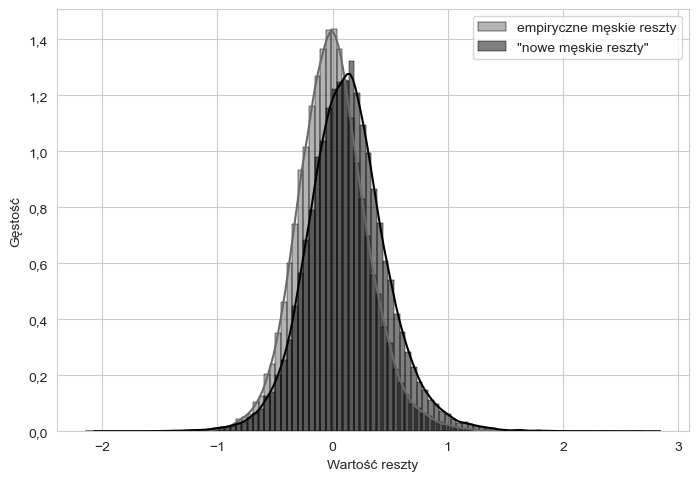

In [36]:
mu0, std0 = norm.fit(meskie_reszty)
mu01, std01 = norm.fit(meskie_reszty_nowe)

# Taki sam rozmiar jak wykres 1: 18 cm x 12.5 cm = 7.09 x 4.92 cala
plt.figure(figsize=(7.09, 4.92))
sns.set_style("whitegrid")

# Histogram 1 – empiryczne (jasnoszare)
sns.histplot(
    meskie_reszty, bins=100, kde=True,
    color='dimgray', edgecolor='black', stat='density',
    label="empiryczne męskie reszty"
)
# Histogram 2 – kontrfaktyczne (czarne)
sns.histplot(
    meskie_reszty_nowe, bins=100, kde=True,
    color='black', edgecolor='black', stat='density',
    label='"nowe męskie reszty"'
)
# Opisy osi
plt.xlabel("Wartość reszty", fontsize=10)
plt.ylabel("Gęstość", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Legenda
plt.legend(fontsize=10)
formatter = FuncFormatter(lambda x, _: f"{x:.1f}".replace('.', ','))
plt.gca().yaxis.set_major_formatter(formatter)
# Dopasowanie układu
plt.tight_layout()

#plt.show()
#plt.savefig("meski_histogram.png", format = "png", dpi = 300)

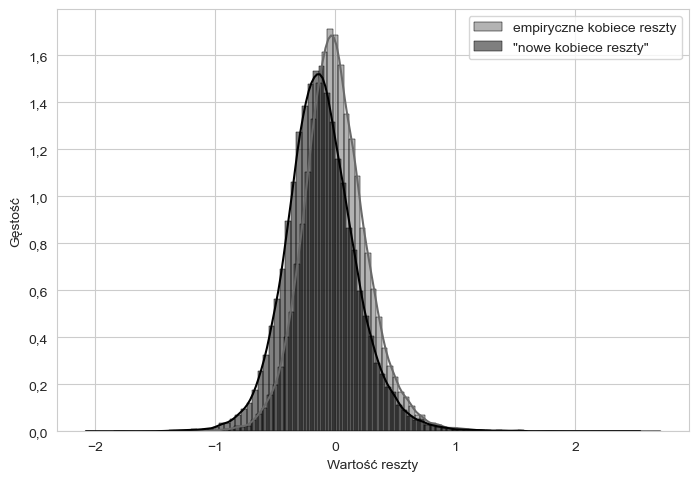

In [37]:
mu1, std1 = norm.fit(kobiece_reszty)
mu02, std02 = norm.fit(kobiece_reszty_nowe)

# Taki sam rozmiar jak wykres 1: 18 cm x 12.5 cm = 7.09 x 4.92 cala
plt.figure(figsize=(7.09, 4.92))
sns.set_style("whitegrid")

# Histogram 1 – empiryczne (jasnoszare)
sns.histplot(
    kobiece_reszty, bins=100, kde=True,
    color='dimgray', edgecolor='black', stat='density',
    label="empiryczne kobiece reszty"
)
# Histogram 2 – kontrfaktyczne (czarne)
sns.histplot(
    kobiece_reszty_nowe, bins=100, kde=True,
    color='black', edgecolor='black', stat='density',
    label='"nowe kobiece reszty"'
)
# Opisy osi
plt.xlabel("Wartość reszty", fontsize=10)
plt.ylabel("Gęstość", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Legenda
plt.legend(fontsize=10)
# Dopasowanie układu
formatter = FuncFormatter(lambda x, _: f"{x:.1f}".replace('.', ','))
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()

#plt.show()
#plt.savefig("kobiecy_histogram.png", format = "png", dpi = 300)